<a href="https://colab.research.google.com/github/zafe312/car_recommender/blob/main/car_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI classifier to recommend cars based on user input


1.   Create dataset
2.   Test out different classifiers



## Create random dataset

In [26]:
import pandas as pd
import numpy as np
import random

In [58]:
# Features of each datapoint
columns = ['id', 'Listed Name', 'Condition', 'Make', 'Model', 'Body', 'Mileage', 'Month', 'Year', 'Price', 'Length', 'Width', 'Height', 'Ground clearance', 'Seats', 
           'Global NCAP', 'Fuel type', 'Engine', 'Displacement', 'Cylinder', 'Transmission', 'Drive', 'Exterior Color', 'Interior Color', 'Unladen weight', 
           'Gross vehicle weight', 'Location', 'Latitude', 'Longitude']

In [25]:
id = [1000 + i for i in range(1,500)]
Condition = ['New', 'Used', 'Certified']
Make = ['Hyundai', 'Tata', 'Mahindra', 'Nissan', 'Toyota', 'Kia', 'Ford', 'Chevrolet', 'Honda', 'Maruti Suzuki', 'Renault']
Model = ['A','B','C']
Body = ['Hatchback', 'SUV', 'CUV', 'MUV', 'Sedan', 'Minivan', 'Convertible', 'Coupe', 'Off-road']
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Year = [2005 + i for i in range(18)]
price_min = 300000
price_max = 2200000
Seats = [5,6,7,8,10]
Ncap = [0,1,2,3,4,5]
Fuel = ['Petrol', 'Diesel', 'Electric', 'Hybrid']
Cylinder = [3,4,5]
Transmission = ['Automatic', 'Semi-automatic', 'Manual']
Drive = ['FWD', 'BWD', '4WD']
Ext_color = ['White', 'Red', 'Black', 'Brown', 'Silver', 'Green', 'Biege']
Int_color = ['Grey', 'Silver', 'Brown', 'Red']

In [59]:
# Create DataFrame
df = pd.DataFrame(columns=columns)

# Generate random data 
for i in id:
  condition = random.choice(Condition)
  make = random.choice(Make)
  model = random.choice(Model)
  year = random.choice(Year)
  listed_name = f'{condition} {year} {make} {model}'
  body = random.choice(Body)
  mileage = random.randint(2000,100000)
  month = random.choice(Month)
  price = random.randint(price_min,price_max)
  length = random.randint(1000,1500)
  width = random.randint(800,1000)
  height = random.randint(600,1000)
  gd_clearance = random.randint(100,200)
  seats = random.choice(Seats)
  ncap = random.choice(Ncap)
  fuel = random.choice(Fuel)
  engine = random.randint(1,10)
  displacement = random.randint(1000,1500)
  cylinder = random.choice(Cylinder)
  transmission = random.choice(Transmission)
  drive = random.choice(Drive)
  ext_color = random.choice(Ext_color)
  int_color = random.choice(Int_color)
  un_weight = random.randint(1000,2000)
  gross_weight = un_weight + random.randint(50, 100)
  location = random.randint(183773,799382)
  lat = random.uniform(80,127)
  lon = random.uniform(68,97)


  car = [i, listed_name, condition, make, model, body, mileage, month, year, price, length, width, height, 
         gd_clearance, seats, ncap, fuel, engine, displacement, cylinder, transmission, drive, ext_color, 
         int_color, un_weight, gross_weight, location, lat, lon]
  df = pd.DataFrame(np.insert(df.values, len(df.index), values=car, axis=0))

df.columns = columns
df = df.set_index('id')
df.head()

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,Used 2012 Honda B,Used,Honda,B,Coupe,13205,Feb,2012,737970,1445,879,652,130,6,5,Electric,2,1129,5,Automatic,FWD,Silver,Brown,1945,2027,269144,96.1204,76.1219
1002,Used 2022 Tata C,Used,Tata,C,Minivan,16617,Mar,2022,1966230,1272,855,755,138,8,5,Diesel,6,1395,4,Manual,BWD,Biege,Red,1094,1167,383068,108.8,71.5343
1003,New 2013 Ford A,New,Ford,A,SUV,6877,Jun,2013,2140402,1386,871,698,140,8,1,Electric,6,1368,5,Automatic,BWD,Brown,Grey,1997,2075,669330,93.9079,85.0446
1004,Certified 2009 Honda B,Certified,Honda,B,Off-road,43090,Jan,2009,1197572,1480,802,936,189,6,2,Petrol,2,1115,3,Automatic,4WD,Brown,Red,1060,1111,283621,91.2957,92.0096
1005,Certified 2009 Hyundai C,Certified,Hyundai,C,Minivan,45577,Jun,2009,1389812,1472,877,727,151,6,0,Petrol,5,1029,4,Semi-automatic,BWD,Green,Silver,1652,1720,507578,121.922,83.9216


## Visualization

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df.describe()

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude
count,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499.000000,499.000000
unique,432,3,11,3,9,498,12,18,499,326,185,280,101,5,6,4,10,330,3,3,3,7,4,397,394,499,499.000000,499.000000
top,New 2016 Kia B,Used,Ford,B,Hatchback,73156,Oct,2011,1560574,1115,888,878,113,6,5,Hybrid,3,1105,4,Automatic,FWD,Black,Silver,1105,1451,435298,112.866839,77.496613
freq,3,173,52,173,65,2,48,37,1,5,7,5,10,107,96,137,66,5,169,190,175,80,138,4,4,1,1.000000,1.000000


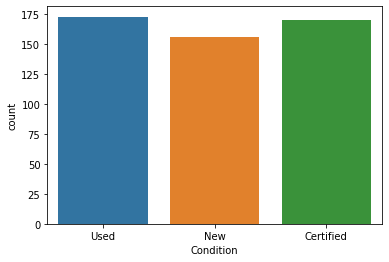

In [68]:
sns.countplot(x = df['Condition'])
plt.show()

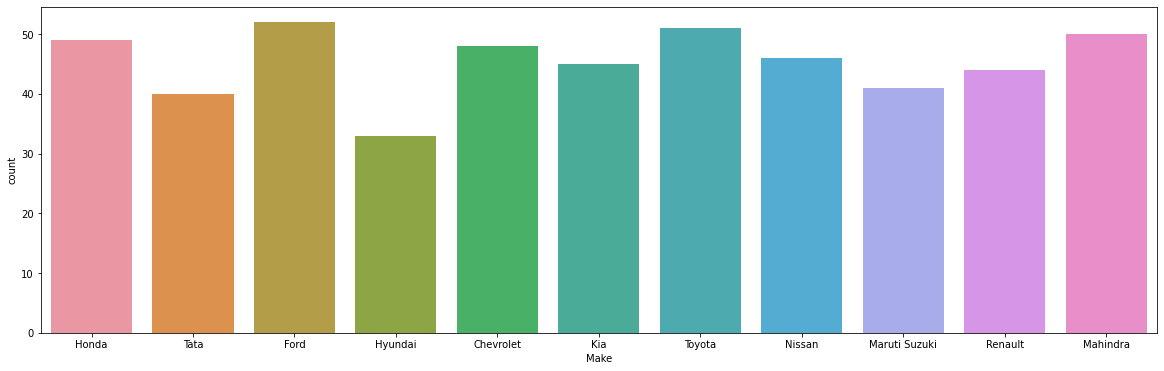

In [72]:
plt.figure(figsize=(20,6))
sns.countplot(x = df['Make'])
plt.show()

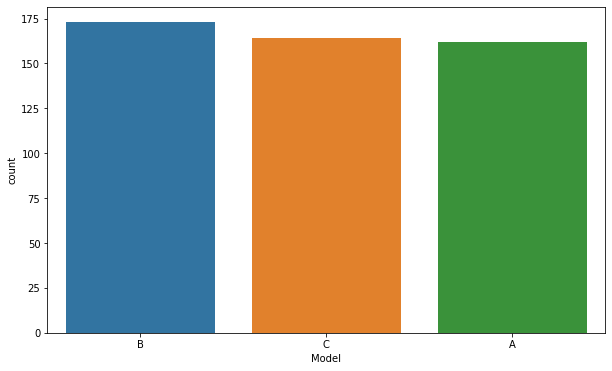

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Model'])
plt.show()

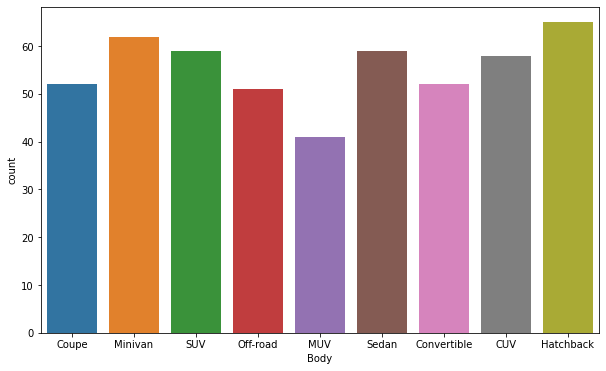

In [88]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Body'])
plt.show()

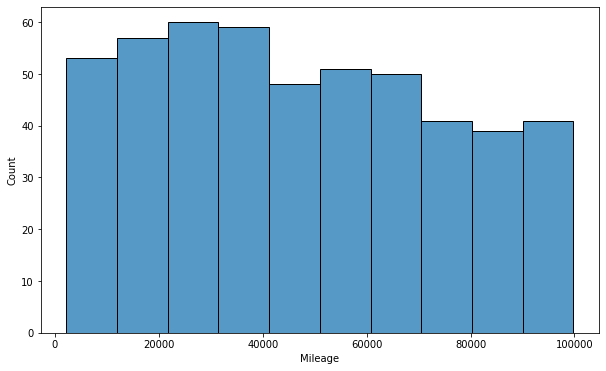

In [86]:
plt.figure(figsize=(10,6))
sns.histplot(x = df['Mileage'])
plt.show()

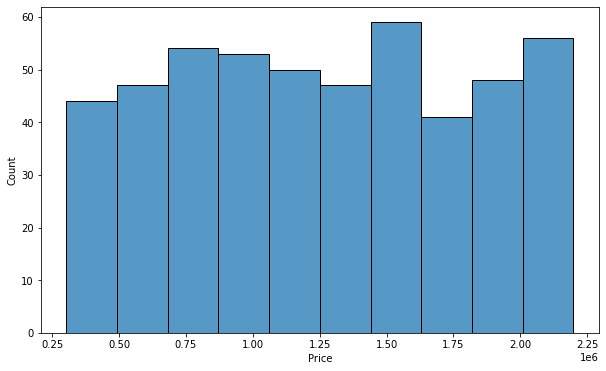

In [87]:
plt.figure(figsize=(10,6))
sns.histplot(x = df['Price'])
plt.show()

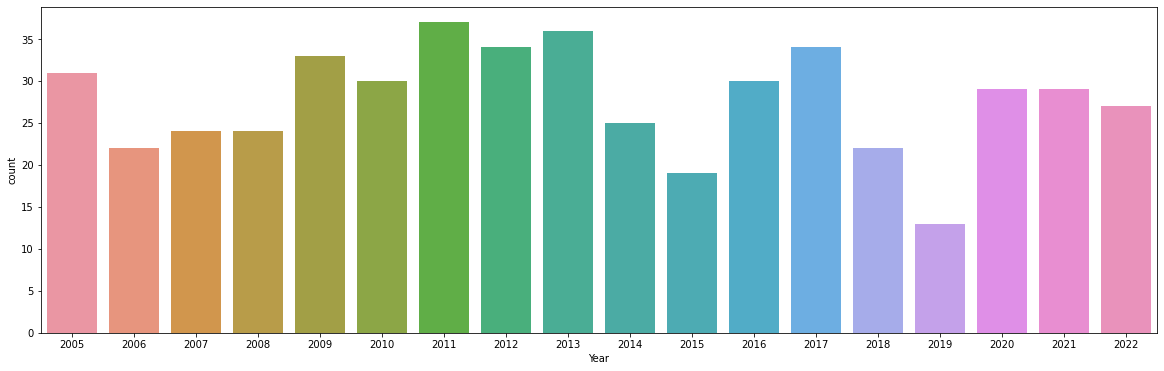

In [83]:
plt.figure(figsize=(20,6))
sns.countplot(x = df['Year'])
plt.show()

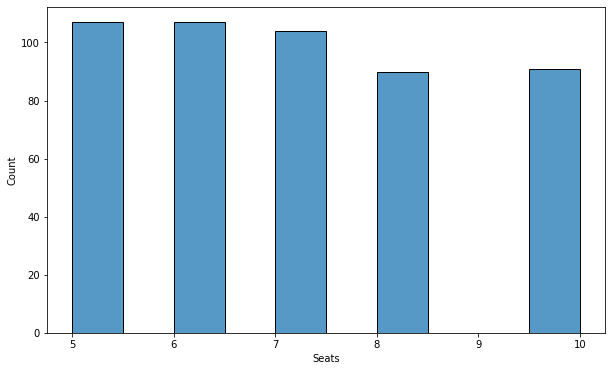

In [90]:
plt.figure(figsize=(10,6))
sns.histplot(x = df['Seats'])
plt.show()

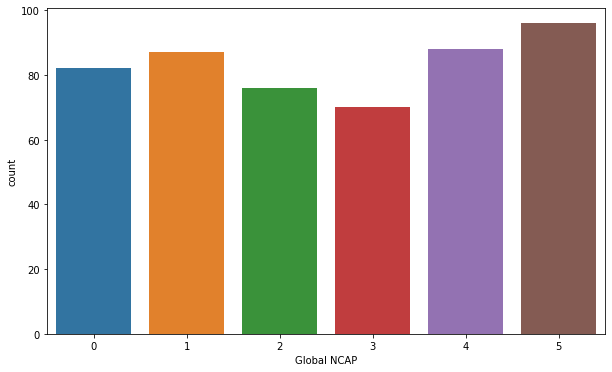

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Global NCAP'])
plt.show()

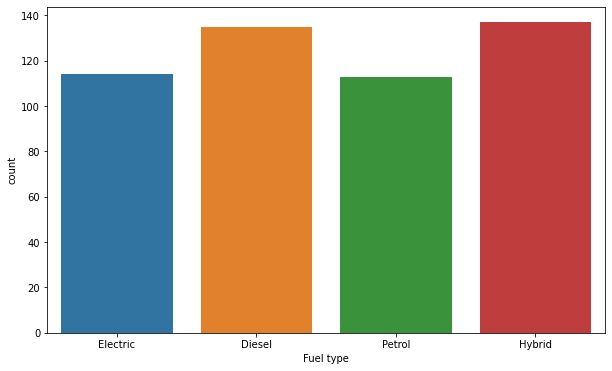

In [97]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Fuel type'])
plt.show()

## Vectorizing the Data